## Рубежный контроль №2
Ромичева Е.В., ИУ5-22М

### Задание
Вариант №2. Кластеризация данных.

Данный вариант выполняется на основе материалов лекции.

Необходимо решить задачу кластеризации на основе любого выбранного Вами датасета.

Кластеризуйте данные с помощью трех различных алгоритмов кластеризации. Алгоритмы выбираются произвольным образом, рекомендуется использовать алгоритмы из лекции.

Сравните качество кластеризации для трех алгоритмов с помощью следующих метрик качества кластеризации:

    Adjusted Rand index
    Adjusted Mutual Information
    Homogeneity, completeness, V-measure
    Коэффициент силуэта

Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.


### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv(r'Admission_Predict_Ver1.1.csv', sep=",")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Предварительная обработка данных

In [3]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [4]:
data.shape

(500, 9)

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
# разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']

## Clustering

In [7]:
# Масштабирование непрерывных переменных
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

df_scale = data.copy()
scaler = preprocessing.StandardScaler()
columns =data.columns[1:7]
df_scale[columns] = scaler.fit_transform(df_scale[columns])
df_scale.head()

c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,0.92
1,2,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,0.76
2,3,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,0.72
3,4,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,0.80
4,5,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,0.65


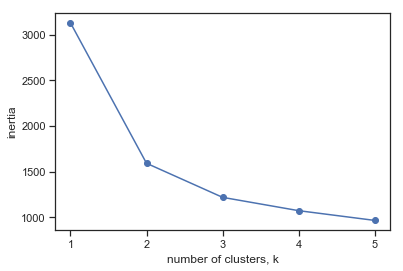

In [8]:
# Первый шаг - найти количество кластеров, которые минимизируют дисперсию, 
# но все же являются практическим числом для анализа.
#Elbow graph
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_scale.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(df_scale.iloc[:,2:9])

# Determine the cluster labels of new_points: labels
df_scale['cluster'] = model.predict(df_scale.iloc[:,2:9])

df_scale.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cluster
0,1,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,0.92,0
1,2,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,0.76,0
2,3,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,0.72,1
3,4,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,0.80,1
4,5,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,0.65,2


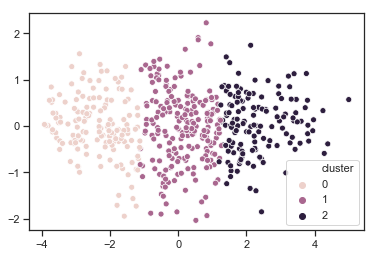

In [10]:
from sklearn.decomposition import PCA
# Create PCA instance: model
model_pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model_pca.fit_transform(df_scale.iloc[:,2:9])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys, hue="cluster", data=df_scale)

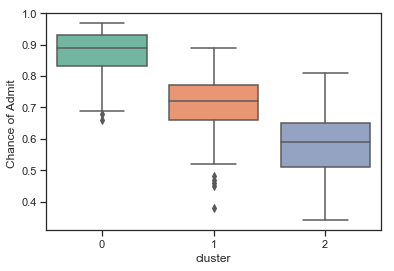

In [11]:
sns.boxplot(x="cluster", y="Chance of Admit ", data=df_scale, palette="Set2" )

In [12]:
centroids = model.cluster_centers_
df_scale.iloc[:,1:10].groupby(['cluster']).mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
cluster,,,,,,,,
0,0.989143,1.022859,1.119896,1.049819,0.958331,1.101100,0.893333,0.874800
1,-0.094409,-0.051288,-0.145865,0.004031,-0.026684,-0.086047,0.526316,0.706411
2,-0.912339,-1.012124,-0.975168,-1.122803,-0.979949,-1.043839,0.255319,0.581631


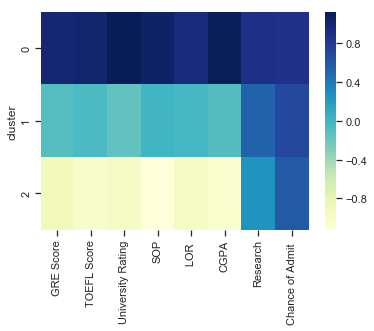

In [13]:
sns.heatmap(df_scale.iloc[:,1:10].groupby(['cluster']).mean(), cmap="YlGnBu")

Cluster 0: Лучшие студенты, более высокий балл по всем параметрам, чем у остальной части населения.

Cluster 1: Средние студенты, почти средние по каждой переменной, но некоторые из них имеют хороший балл по одной переменной, в частности, что делает их более подходящими при поступлении.

Cluster 2: Старающийся ученик, ниже среднего по населению. В ограниченных случаях допускается выдача экстраординарного балла по определенной переменной.

In [14]:
pd.DataFrame(df_scale['cluster'].value_counts(dropna=False))

,cluster
1,209
0,150
2,141


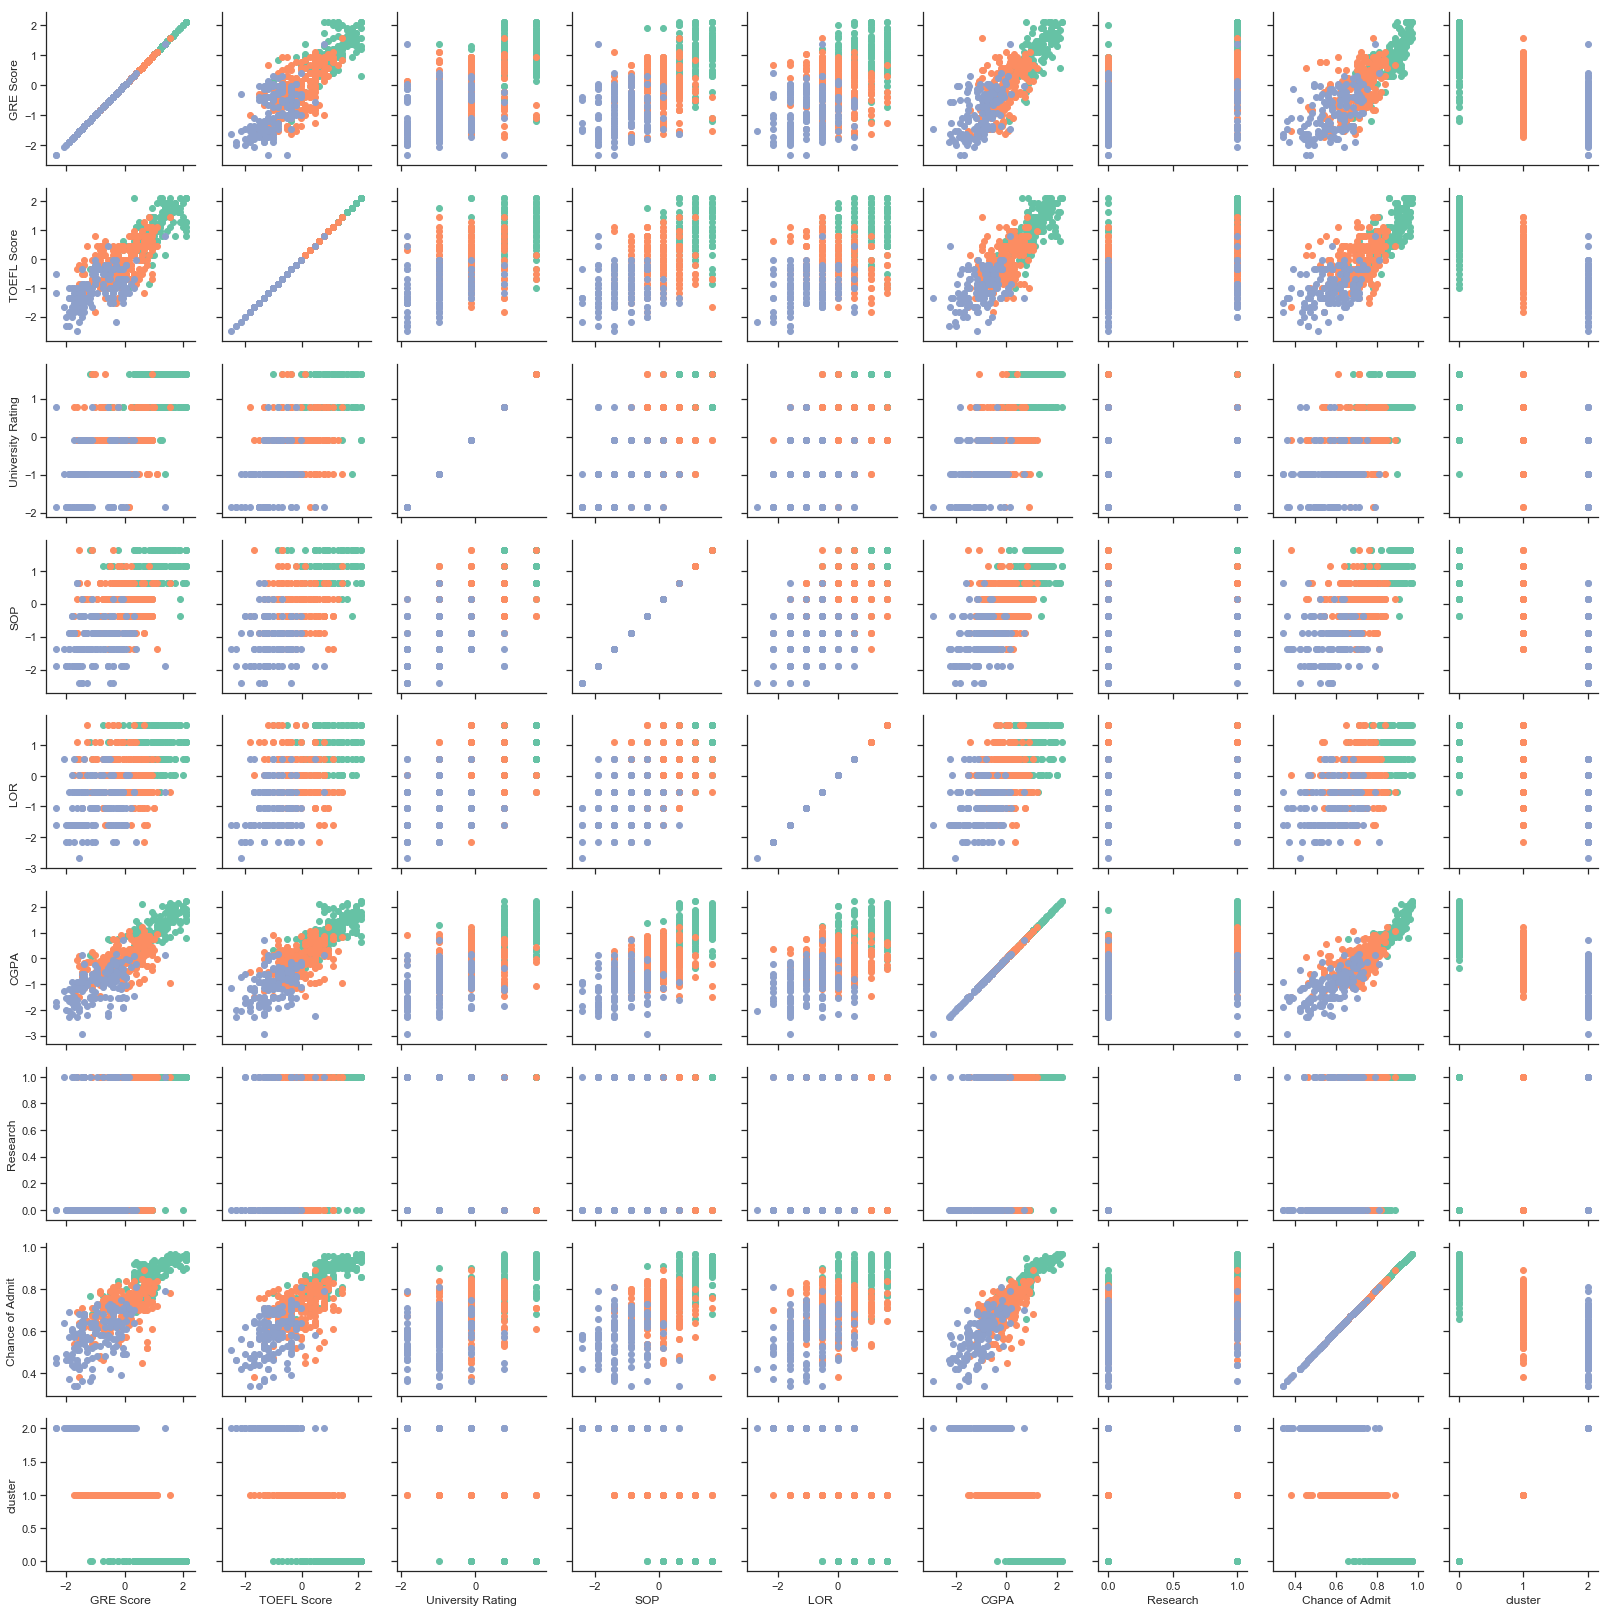

In [15]:
g = sns.PairGrid(df_scale.iloc[:,1:10], hue="cluster", palette="Set2")
g.map(plt.scatter);

In [16]:
algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: Future

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.000475,0.002863,0.038017,0.135749,0.059399,0.563382
Affinity,-0.002309,-0.007255,0.152922,0.250725,0.189975,0.385456
Spectral,0.001534,0.003847,0.038949,0.140749,0.061013,0.547665
Agglomerative,0.001466,0.004381,0.039465,0.142499,0.061811,0.547616


## Выводы
    Наиболее четко выделенные кластеры получились для метрики Silhouette (ближе всего к 1)
    Из всех испробованных методов наилучший результат показал метод K-means
    Для метода Affinity метрики ARI и AMI показали наихудший результат (знаение <0 показывает, что разбиения на кластеры независимы и разрознены)